In [1]:
#import the dependencies


In [6]:
import pandas as pd
import keras
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline

LOADING DATASET

In [7]:
#Load the data set
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine Learningfinal/housing.csv')
#Look at the data first 7 rows of data
df.head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


CHECKING DATASET INFORMATION,DUPLICATES,NULL VALUES

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.isna().sum().any(), df.duplicated().sum().any()

(True, False)

In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Every house must have at least 1 bedroom hence we are filling total_bedrooms with 1**

In [10]:
df = df.fillna(1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ENCODING

In [13]:
 s = (df.dtypes == 'object')
object_cols = list(s[s].index)

ordinal_encoder = OrdinalEncoder()
df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


SPLITTING FEATURES FROM TARGET VARIABLES

In [15]:
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

SPLITTING DATASET USING SKICIT

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2,random_state=42)

CREATING MODEL

In [18]:
input_shape = [X_train.shape[1]]
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
      layers.Dropout(rate=0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(1)
])

COMPILE MODEL

In [19]:
model.compile(
    optimizer='adam',
    loss='mae',
)

TRAIN MODEL

In [20]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=15,
    verbose=1)

Epoch 1/15
166/166 [==============================] - 2s 4ms/step - loss: 156201.5469 - val_loss: 117404.9375
Epoch 2/15
166/166 [==============================] - 0s 3ms/step - loss: 117106.0312 - val_loss: 114213.6953
Epoch 3/15
166/166 [==============================] - 1s 3ms/step - loss: 112215.4609 - val_loss: 107978.1328
Epoch 4/15
166/166 [==============================] - 1s 3ms/step - loss: 105070.2344 - val_loss: 98349.7109
Epoch 5/15
166/166 [==============================] - 0s 3ms/step - loss: 94312.7109 - val_loss: 87706.6094
Epoch 6/15
166/166 [==============================] - 1s 3ms/step - loss: 86843.0781 - val_loss: 82086.8047
Epoch 7/15
166/166 [==============================] - 0s 3ms/step - loss: 84639.0312 - val_loss: 81092.0156
Epoch 8/15
166/166 [==============================] - 0s 3ms/step - loss: 83693.5391 - val_loss: 80421.5547
Epoch 9/15
166/166 [==============================] - 0s 3ms/step - loss: 82842.0000 - val_loss: 79992.9531
Epoch 10/15
166/166 [

Minimum Validation Loss: 78171.2422


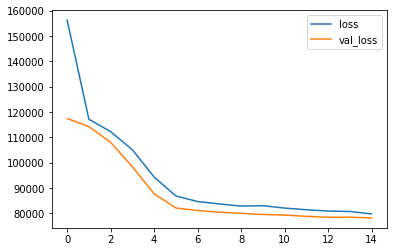

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

FINE TUNING MODEL

In [22]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),    
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='sgd', # SGD is more sensitive to differences of scale
    loss='mae',
    metrics=['mae'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=200,
    epochs=50,
    verbose=1,
)



Epoch 1/50
83/83 [==============================] - 2s 24ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
83/83 [==============================] - 2s 22ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
83/83 [==============================] - 2s 29ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
83/83 [==============================] - 3s 33ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
83/83 [==============================] - 2s 27ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
83/83 [==============================] - 3s 35ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
83/83 [==============================] - 3s 30ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
83/83 [==============================] - 2s 22ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
83/83 [==============================